In [1]:
## Install the following if you don't already have it (uncomment line below)
# !pip install pandas
# !pip install kats

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

cm = 1/2.54  # centimeters in inches

In [3]:
#The datas are not uploaded to the repository, extract them to your base folder

# Cebrina's   Path: C:\Users\cebri\Documents\Wind Power Estimation\Data
# Guillermo's Path: C:\DTU\\02456 - Deep Learning\Project\Datasets
# Tomi's      Path: C:\Users\PC\Documents\GitHub\WindPower_Estimation

dataPath = r'C:\Users\PC\Documents\GitHub\WindPower_Estimation'

# Reading Turbine power Curves
turbine_1_power = pd.read_csv (r''+dataPath+'\Case1\Turbine_Info\Power_Curve.txt', header=0, delim_whitespace=True)
turbine_2_power = pd.read_csv (r''+dataPath+'\Case2\Turbine_Info\Power_Curve.txt', header=0, delim_whitespace=True)
turbine_3_power = pd.read_csv (r''+dataPath+'\Case3\Turbine_Info\Power_Curve.txt', header=0, delim_whitespace=True)

# Renaming of the headers
turbine_1_power = turbine_1_power.rename(columns={ turbine_1_power.columns[0]: 'Case1 Turbine'})
turbine_2_power = turbine_2_power.rename(columns={ turbine_2_power.columns[0]: 'Case2 Turbine'})
turbine_3_power = turbine_3_power.rename(columns={ turbine_3_power.columns[0]: 'Case3 Turbine'})

# Concatenation the Turbines to 1 dataframe
all_turbines_power_curve_dataframe = pd.concat([turbine_1_power, turbine_2_power,turbine_3_power ], axis=1)

# Interpolation for the missing values
all_turbines_power_curve_dataframe.interpolate(inplace=True)

# Renaming ofthe the index column
all_turbines_power_curve_dataframe.index.name = 'Wind Speed'
print( all_turbines_power_curve_dataframe )

            Case1 Turbine  Case2 Turbine  Case3 Turbine
Wind Speed                                             
3.0                 12.30        4.52981          21.70
3.5                 24.60       36.96220          56.60
4.0                 36.90       73.13270          91.50
4.5                 79.55      117.56100         143.70
5.0                122.20      166.71600         195.90
5.5                177.60      228.79400         272.35
6.0                233.00      303.82100         348.80
6.5                311.05      391.37400         455.60
7.0                389.10      495.37900         562.40
7.5                493.10      618.06200         704.20
8.0                597.10      759.14900         846.00
8.5                729.45      911.89800        1009.85
9.0                861.80     1077.04000        1173.70
9.5               1013.90     1244.10000        1336.85
10.0              1166.00     1410.75000        1500.00
10.5              1330.70     1500.61000        

In [4]:
# Reading Turbine info
turbine_1_info = pd.read_csv (r''+dataPath+'\Case1\Turbine_Info\Info.txt', header=None, delimiter=":", names =['Name', 'val'] )
turbine_2_info = pd.read_csv (r''+dataPath+'\Case2\Turbine_Info\Info.txt', header=None, delimiter=":", names =['Name', 'val'])
turbine_3_info = pd.read_csv (r''+dataPath+'\Case3\Turbine_Info\Info.txt', header=None, delimiter=":", names =['Name', 'val'])

#Creation of the lists
col_one_list = turbine_1_info.iloc[: , 0].tolist()
turbine_1_info = turbine_1_info.iloc[: , 1].tolist()
turbine_2_info = turbine_2_info.iloc[: , 1].tolist()
turbine_3_info = turbine_3_info.iloc[: , 1].tolist()
table = tuple(zip(*list(zip(turbine_1_info, turbine_2_info, turbine_3_info))))

# Concatenation the Turbines to 1 dataframe
all_turbines_info_dataframe = pd.DataFrame( (table) ,columns =col_one_list )
#Increastion of the indexing
all_turbines_info_dataframe.index += 1 

print( all_turbines_info_dataframe)

  Rated Power Hub Height Blade Length
1      1500KW        65m        38.5m
2      1500KW        65m        38.5m
3      1500KW        80m          43m


Text(0.5, 0.98, 'Different types of turbines')

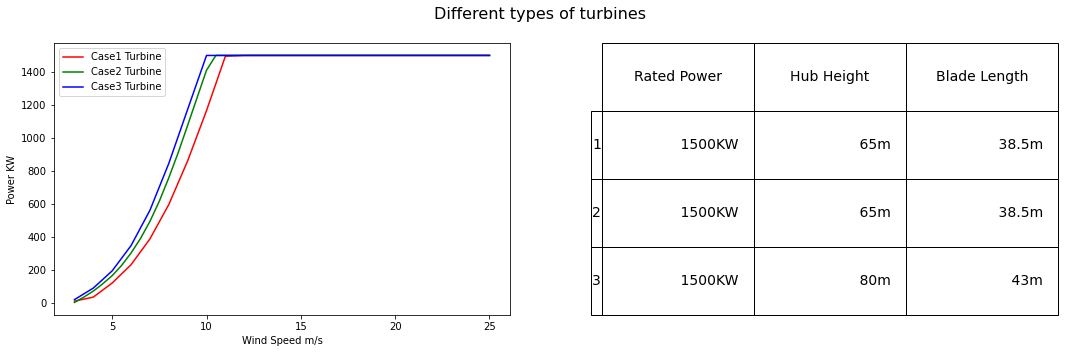

In [5]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(121)
all_turbines_power_curve_dataframe.plot(kind='line',y='Case1 Turbine',style=['r-'], ax=ax1)
all_turbines_power_curve_dataframe.plot(kind='line',y='Case2 Turbine',style=['g-'], ax=ax1)
all_turbines_power_curve_dataframe.plot(kind='line',y='Case3 Turbine',style=['b-'], ax=ax1)
ax1.set_ylabel('Power KW')
ax1.set_xlabel('Wind Speed m/s')

ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = all_turbines_info_dataframe.values, rowLabels = all_turbines_info_dataframe.index, bbox=bbox, colLabels=all_turbines_info_dataframe.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

fig.suptitle('Different types of turbines', fontsize=16)

In [6]:
# Reading the measurements
measurement_case_1 = pd.read_csv (r''+dataPath+'\Case1\Proj_Measurements_Case1.csv', header=0)
measurement_case_2 = pd.read_csv (r''+dataPath+'\Case2\Proj_Measurements_Case2.csv', header=0)
measurement_case_3 = pd.read_csv (r''+dataPath+'\Case3\Proj_Measurements_Case3.csv', header=0)

# Set indexing to the Date_time
measurement_case_1['Date_Time']= pd.to_datetime(measurement_case_1['Date_Time'])
measurement_case_2['Date_Time']= pd.to_datetime(measurement_case_2['Date_Time'])
measurement_case_3['Date_Time']= pd.to_datetime(measurement_case_3['Date_Time'])

measurement_case_1.head()

,Date_Time,Speed_10m,Direction_10m,Speed_30m,Direction_30m,Speed_65m,Direction_65m,Speed_70m,Direction_70m,Speed_80m,Direction_80m,Park Power [KW]
0,2017-01-07 20:15:00,2.950,96.4,1.800,89.6,3.300,200.0,3.400,187.1,0.0,0.0,NaN
1,2017-01-07 20:30:00,2.967,91.3,3.033,77.1,2.467,194.5,2.833,178.6,0.0,0.0,NaN
2,2017-01-07 20:45:00,3.167,86.1,2.667,65.3,1.767,178.8,2.067,160.7,0.0,0.0,NaN
3,2017-01-07 21:00:00,3.300,85.5,2.800,58.5,1.600,176.0,1.750,157.5,0.0,0.0,NaN
4,2017-01-07 21:15:00,3.300,85.5,2.800,58.5,1.600,176.0,1.750,157.6,0.0,0.0,NaN


In [7]:
# Reading the NWP data
nwp_case_1 = pd.read_csv (r''+dataPath+'\Case1\Proj_NWP_Case1.csv', header=0)
nwp_case_2 = pd.read_csv (r''+dataPath+'\Case2\Proj_NWP_Case2.csv', header=0)
nwp_case_3 = pd.read_csv (r''+dataPath+'\Case3\Proj_NWP_Case3.csv', header=0)

# Set indexing to the Date_time
nwp_case_1['Date_Time']= pd.to_datetime(nwp_case_1['Date_Time'])
nwp_case_2['Date_Time']= pd.to_datetime(nwp_case_2['Date_Time'])
nwp_case_3['Date_Time']= pd.to_datetime(nwp_case_3['Date_Time'])

# Completing missing date_times in NWP data
nwp_case_1 = nwp_case_1.merge(measurement_case_1['Date_Time'],on='Date_Time',how='outer')
nwp_case_2 = nwp_case_2.merge(measurement_case_2['Date_Time'],on='Date_Time',how='outer')
nwp_case_3 = nwp_case_3.merge(measurement_case_3['Date_Time'],on='Date_Time',how='outer')

nwp_case_1.head()

,Date_Time,Direction_10m,Speed_10m,Temperature_10m,Pressure_seaLevel,Air Density_10m,Direction_50m,Speed_50m,Temperature_50m,Air Density_50m,Direction_100m,Speed_100m,Temperature_100m,Air Density_100m,Direction_150m,Speed_150m,Temperature_150m,Air Density_150m
0,2016-01-01 20:00:00,272.0,3.30,-5.30,995.0,1.295,270.0,2.60,-5.30,1.295,275.0,6.10,-5.30,1.295,276.0,9.70,-5.30,1.295
1,2016-01-01 20:15:00,272.0,3.47,-5.34,995.0,1.295,270.0,2.74,-5.34,1.295,275.0,6.35,-5.34,1.295,276.0,10.04,-5.34,1.295
2,2016-01-01 20:30:00,272.0,3.66,-5.46,995.0,1.296,270.0,2.91,-5.46,1.296,274.0,6.64,-5.46,1.296,276.0,10.42,-5.46,1.296
3,2016-01-01 20:45:00,271.0,3.86,-5.65,995.0,1.297,270.0,3.09,-5.65,1.297,274.0,6.94,-5.65,1.297,275.0,10.83,-5.65,1.297
4,2016-01-01 21:00:00,271.0,4.08,-5.89,995.0,1.298,269.0,3.29,-5.89,1.298,273.0,7.26,-5.89,1.298,274.0,11.25,-5.89,1.298


In [8]:
#Setting date times as indexes
measurement_case_1 = measurement_case_1.set_index('Date_Time')
measurement_case_2 = measurement_case_2.set_index('Date_Time')
measurement_case_3 = measurement_case_3.set_index('Date_Time')
nwp_case_1 = nwp_case_1.set_index('Date_Time')
nwp_case_2 = nwp_case_2.set_index('Date_Time')
nwp_case_3 = nwp_case_3.set_index('Date_Time')

measurement_case_1.sort_index()
measurement_case_2.sort_index()
measurement_case_3.sort_index()
nwp_case_1.sort_index()
nwp_case_2.sort_index()
nwp_case_3.sort_index()

,Direction_10m,Speed_10m,Temperature_10m,Pressure_seaLevel,Air Density_10m,Direction_50m,Speed_50m,Temperature_50m,Air Density_50m,Direction_100m,Speed_100m,Temperature_100m,Air Density_100m,Direction_150m,Speed_150m,Temperature_150m,Air Density_150m
Date_Time,,,,,,,,,,,,,,,,,
2016-01-01 20:00:00,230.0,3.30,-1.70,997.80,1.281,229.0,2.40,-1.70,1.281,231.0,7.20,-1.70,1.281,232.0,12.00,-1.70,1.281
2016-01-01 20:15:00,231.0,3.23,-1.80,997.81,1.282,230.0,2.35,-1.80,1.282,232.0,7.06,-1.80,1.282,233.0,11.79,-1.80,1.282
2016-01-01 20:30:00,231.0,3.17,-1.89,997.82,1.282,230.0,2.31,-1.89,1.282,232.0,6.93,-1.89,1.282,234.0,11.59,-1.89,1.282
2016-01-01 20:45:00,231.0,3.12,-1.97,997.83,1.282,230.0,2.27,-1.97,1.282,233.0,6.80,-1.97,1.282,234.0,11.39,-1.97,1.282
2016-01-01 21:00:00,232.0,3.07,-2.04,997.84,1.283,230.0,2.24,-2.04,1.283,233.0,6.68,-2.04,1.283,234.0,11.19,-2.04,1.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-15 02:15:00,92.0,2.02,14.63,993.68,1.203,79.0,1.60,14.63,1.203,111.0,4.31,14.63,1.203,118.0,7.31,14.63,1.203
2020-09-15 02:30:00,92.0,2.04,14.55,993.66,1.204,79.0,1.60,14.55,1.204,111.0,4.33,14.55,1.204,118.0,7.35,14.55,1.204
2020-09-15 02:45:00,92.0,2.06,14.46,993.64,1.204,79.0,1.60,14.46,1.204,111.0,4.36,14.46,1.204,118.0,7.41,14.46,1.204


<AxesSubplot:xlabel='Date_Time'>

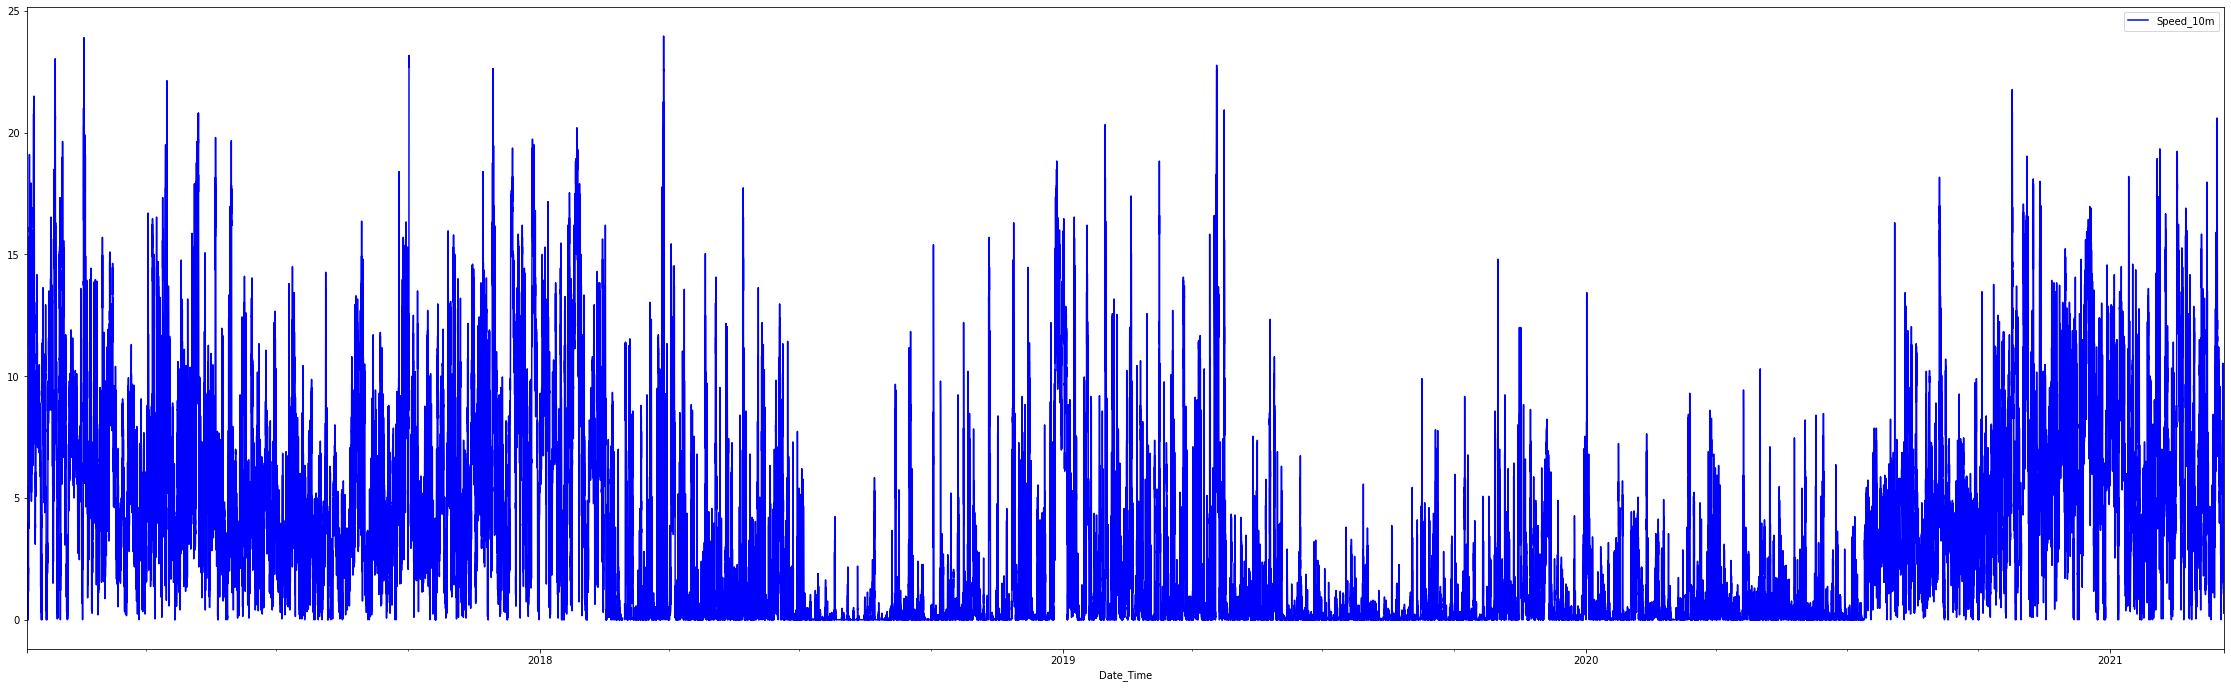

In [9]:
fig = plt.figure(figsize=(100*cm,30*cm))
ax1 = plt.gca()
measurement_case_1.plot(kind='line', y='Speed_10m',style=['b-'], ax=ax1)

In [10]:
# Splitting measurement data into training and test sets
# Method chosen: training set vs holdout (test) set
# Because data is a time series, we need to respect the sequence (not pick data at random)
# First portion of the data will be training set, last portion will be holdout
train_test_proportion = 0.8

train_test_threshold_1 = np.int(np.floor(len(measurement_case_1)*train_test_proportion))
train_test_threshold_2 = np.int(np.floor(len(measurement_case_2)*train_test_proportion))
train_test_threshold_3 = np.int(np.floor(len(measurement_case_3)*train_test_proportion))

measurement_train_1 = measurement_case_1[0:train_test_threshold_1]
measurement_train_2 = measurement_case_2[0:train_test_threshold_2]
measurement_train_3 = measurement_case_3[0:train_test_threshold_3]

measurement_test_1 = measurement_case_1[train_test_threshold_1:]
measurement_test_2 = measurement_case_2[train_test_threshold_2:]
measurement_test_3 = measurement_case_3[train_test_threshold_3:]

# Splitting NWP data into training and test sets
# Making date-time limits between sets match
# (not sure if this is the correct approach)

nwp_train_1 = nwp_case_1[nwp_case_1.index <= max(measurement_train_1.index)]
nwp_train_2 = nwp_case_2[nwp_case_2.index <= max(measurement_train_2.index)]
nwp_train_3 = nwp_case_3[nwp_case_3.index <= max(measurement_train_3.index)]

nwp_test_1 = nwp_case_1[nwp_case_1.index >= min(measurement_test_1.index)]
nwp_test_2 = nwp_case_2[nwp_case_2.index >= min(measurement_test_2.index)]
nwp_test_3 = nwp_case_3[nwp_case_3.index >= min(measurement_test_3.index)]

<ipython-input-10-dca58e53844e>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_test_threshold_1 = np.int(np.floor(len(measurement_case_1)*train_test_proportion))
<ipython-input-10-dca58e53844e>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

In [11]:
# Using linear interpolation to fill in missing values
# Applying interpolation to training and test sets separately

measurement_train_1.interpolate(inplace=True, limit_direction='both')
measurement_train_2.interpolate(inplace=True, limit_direction='both')
measurement_train_3.interpolate(inplace=True, limit_direction='both')

measurement_test_1.interpolate(inplace=True, limit_direction='both')
measurement_test_2.interpolate(inplace=True, limit_direction='both')
measurement_test_3.interpolate(inplace=True, limit_direction='both')

nwp_train_1.interpolate(inplace=True, limit_direction='both')
nwp_train_2.interpolate(inplace=True, limit_direction='both')
nwp_train_3.interpolate(inplace=True, limit_direction='both')

nwp_test_1.interpolate(inplace=True, limit_direction='both')
nwp_test_2.interpolate(inplace=True, limit_direction='both')
nwp_test_3.interpolate(inplace=True, limit_direction='both')

<ipython-input-11-5bdbc7e39543>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_train_1.interpolate(inplace=True, limit_direction='both')
<ipython-input-11-5bdbc7e39543>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_train_2.interpolate(inplace=True, limit_direction='both')
<ipython-input-11-5bdbc7e39543>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_train_3.interpolate(inplace=True, limit_dire

In [12]:
import kats#
from kats.consts import TimeSeriesData
from kats.detectors.outlier import OutlierDetector

# Detecting and interpolating outliers

set_columns = ['Speed_10m','Speed_30m','Speed_65m','Speed_70m', \
                'Direction_10m','Direction_30m','Direction_65m','Direction_70m','Park Power [KW]']

# Measurement 1 (train)
df = measurement_train_1

old_index = df.index
new_index = pd.date_range(start=pd.to_datetime('1678-01-01 00:00'), periods=len(df))
df = df.set_index(new_index)

for column in set_columns:
    ts = TimeSeriesData(time=df[column].index, value=df[column])
    outlier_detector = OutlierDetector(ts, "additive")
    outlier_detector.detector()
    outliers = outlier_detector.outliers
    df_interpolated = outlier_detector.remover(interpolate=True).to_dataframe()
    df_interpolated = df_interpolated.set_index('time')

    df[column] = df_interpolated['y_0']

df = df.set_index(old_index)
measurement_train_1 = df

# Measurement 1 (test)
df = measurement_test_1

old_index = df.index
new_index = pd.date_range(start=pd.to_datetime('1678-01-01 00:00'), periods=len(df))
df = df.set_index(new_index)

for column in set_columns:
    ts = TimeSeriesData(time=df[column].index, value=df[column])
    outlier_detector = OutlierDetector(ts, "additive")
    outlier_detector.detector()
    outliers = outlier_detector.outliers
    df_interpolated = outlier_detector.remover(interpolate=True).to_dataframe()
    df_interpolated = df_interpolated.set_index('time')

    df[column] = df_interpolated['y_0']

df = df.set_index(old_index)
measurement_test_1 = df

# Measurement 2 (train)
df = measurement_train_2

old_index = df.index
new_index = pd.date_range(start=pd.to_datetime('1678-01-01 00:00'), periods=len(df))
df = df.set_index(new_index)

for column in set_columns:
    ts = TimeSeriesData(time=df[column].index, value=df[column])
    outlier_detector = OutlierDetector(ts, "additive")
    outlier_detector.detector()
    outliers = outlier_detector.outliers
    df_interpolated = outlier_detector.remover(interpolate=True).to_dataframe()
    df_interpolated = df_interpolated.set_index('time')

    df[column] = df_interpolated['y_0']

df = df.set_index(old_index)
measurement_train_2 = df

# Measurement 2 (test)
df = measurement_test_2

old_index = df.index
new_index = pd.date_range(start=pd.to_datetime('1678-01-01 00:00'), periods=len(df))
df = df.set_index(new_index)

for column in set_columns:
    ts = TimeSeriesData(time=df[column].index, value=df[column])
    outlier_detector = OutlierDetector(ts, "additive")
    outlier_detector.detector()
    outliers = outlier_detector.outliers
    df_interpolated = outlier_detector.remover(interpolate=True).to_dataframe()
    df_interpolated = df_interpolated.set_index('time')

    df[column] = df_interpolated['y_0']

df = df.set_index(old_index)
measurement_test_2 = df

set_columns = ['Speed_10m','Speed_30m','Speed_50m','Speed_80m', \
                'Direction_10m','Direction_30m','Direction_50m','Direction_80m','Park Power [KW]']

# Measurement 3 (train)
df = measurement_train_3

old_index = df.index
new_index = pd.date_range(start=pd.to_datetime('1678-01-01 00:00'), periods=len(df))
df = df.set_index(new_index)

for column in set_columns:
    ts = TimeSeriesData(time=df[column].index, value=df[column])
    outlier_detector = OutlierDetector(ts, "additive")
    outlier_detector.detector()
    outliers = outlier_detector.outliers
    df_interpolated = outlier_detector.remover(interpolate=True).to_dataframe()
    df_interpolated = df_interpolated.set_index('time')

    df[column] = df_interpolated['y_0']

df = df.set_index(old_index)
measurement_train_3 = df

# Measurement 3 (test)
df = measurement_test_3

old_index = df.index
new_index = pd.date_range(start=pd.to_datetime('1678-01-01 00:00'), periods=len(df))
df = df.set_index(new_index)

for column in set_columns:
    ts = TimeSeriesData(time=df[column].index, value=df[column])
    outlier_detector = OutlierDetector(ts, "additive")
    outlier_detector.detector()
    outliers = outlier_detector.outliers
    df_interpolated = outlier_detector.remover(interpolate=True).to_dataframe()
    df_interpolated = df_interpolated.set_index('time')

    df[column] = df_interpolated['y_0']

df = df.set_index(old_index)
measurement_test_3 = df

ModuleNotFoundError: No module named 'kats'

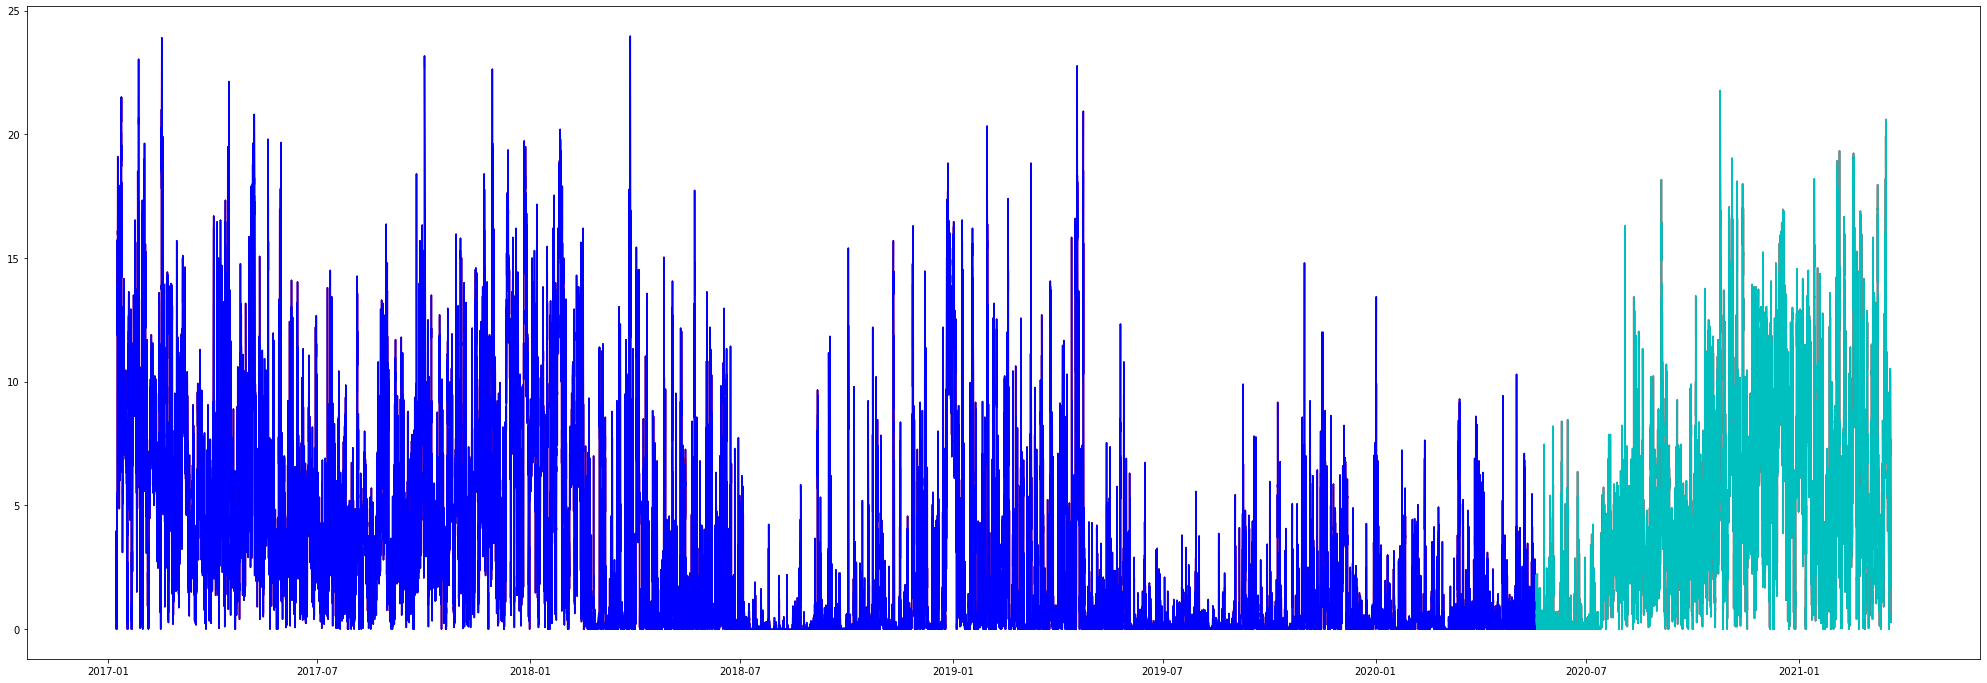

In [13]:
fig = plt.figure(figsize=(35,12))

plt.plot(measurement_case_1.index, measurement_case_1['Speed_10m'], 'r')
plt.plot(measurement_train_1.index, measurement_train_1['Speed_10m'], 'b')
plt.plot(measurement_test_1.index, measurement_test_1['Speed_10m'], 'c')
plt.show()

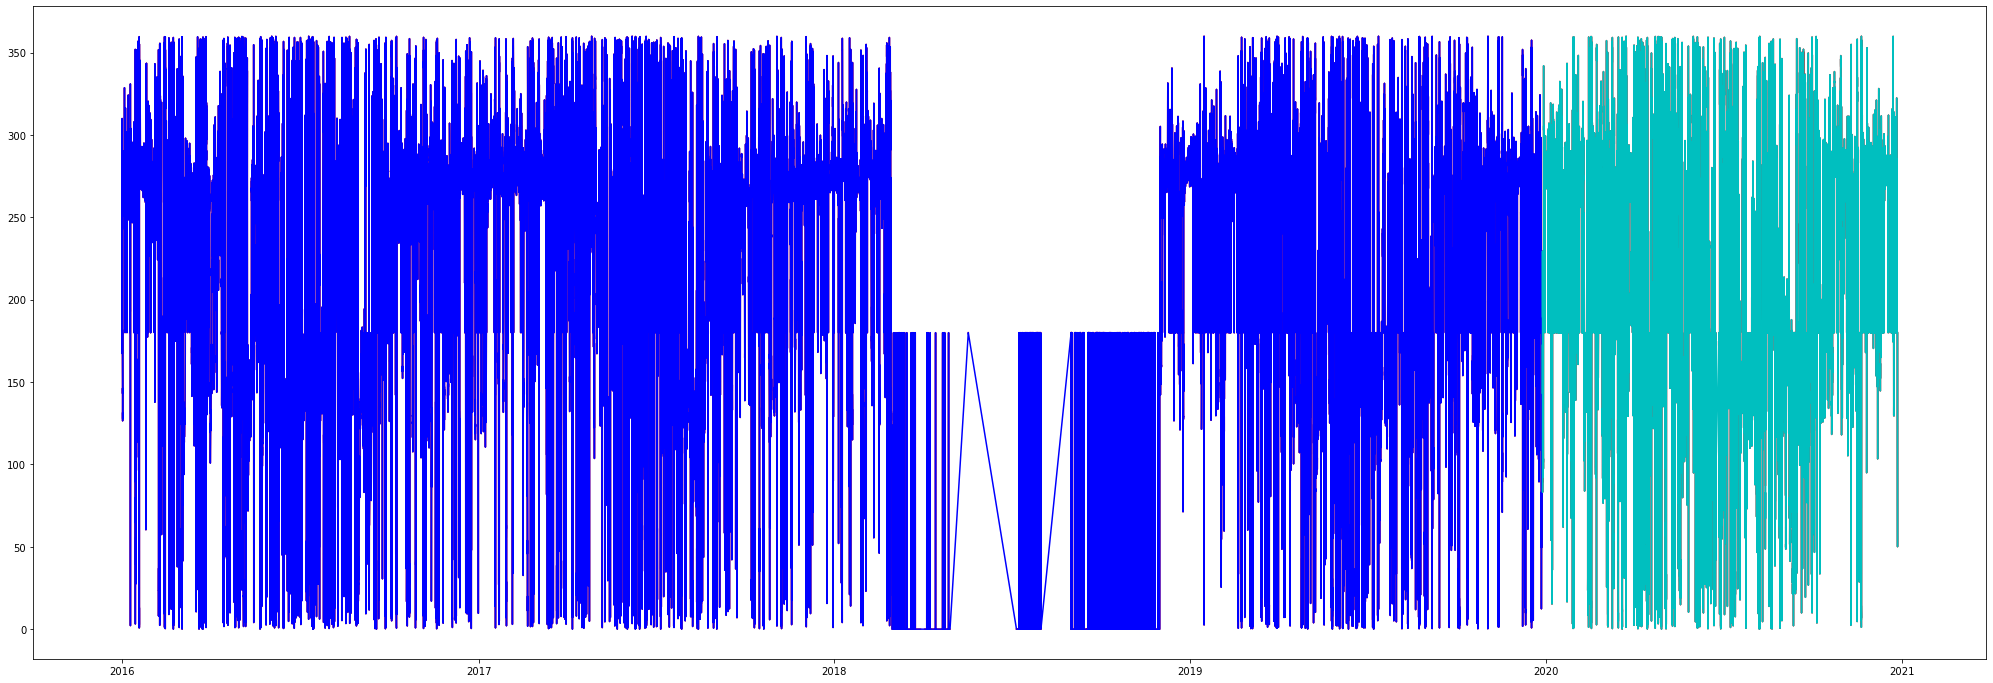

In [14]:
fig = plt.figure(figsize=(35,12))

plt.plot(measurement_case_2.index, measurement_case_2['Direction_70m'], 'r')
plt.plot(measurement_train_2.index, measurement_train_2['Direction_70m'], 'b')
plt.plot(measurement_test_2.index, measurement_test_2['Direction_70m'], 'c')
plt.show()

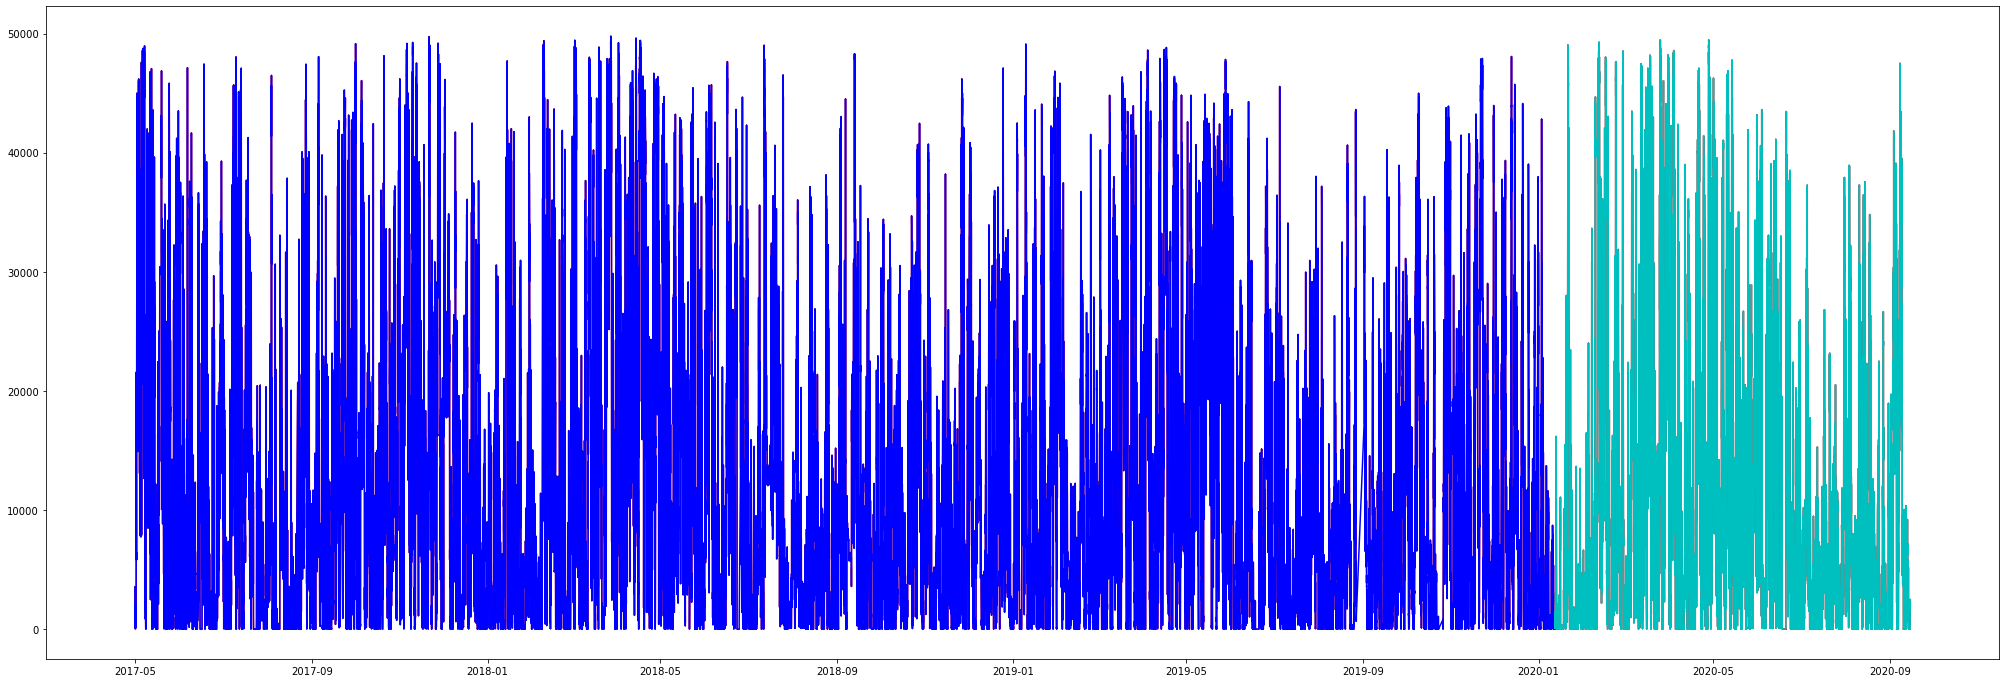

In [15]:
fig = plt.figure(figsize=(35,12))

plt.plot(measurement_case_3.index, measurement_case_3['Park Power [KW]'], 'r')
plt.plot(measurement_train_3.index, measurement_train_3['Park Power [KW]'], 'b')
plt.plot(measurement_test_3.index, measurement_test_3['Park Power [KW]'], 'c')
plt.show()

In [16]:
# Normalizing the data
# For each column in the training datasets, values are normalized according to max and mins in each column
# The same max and mins are used for the columns in the test datasets, in order to keep proportion

set_columns = ['Speed_10m','Speed_30m','Speed_65m','Speed_70m', \
                'Direction_10m','Direction_30m','Direction_65m','Direction_70m','Park Power [KW]']

# Measurement 1 (train and test)
measurement_norm_1 = {}

for column in set_columns:
    maxvalue = max(measurement_train_1[column].dropna())
    minvalue = min(measurement_train_1[column].dropna())
    measurement_train_1[column] = (measurement_train_1[column]-minvalue)/(maxvalue-minvalue)
    measurement_test_1[column] = (measurement_test_1[column]-minvalue)/(maxvalue-minvalue)
    measurement_norm_1[column] = {"max": maxvalue, "min": minvalue}

# Measurement 2 (train and test)
measurement_norm_2 = {}

for column in set_columns:
    maxvalue = max(measurement_train_2[column].dropna())
    minvalue = min(measurement_train_2[column].dropna())
    measurement_train_2[column] = (measurement_train_2[column]-minvalue)/(maxvalue-minvalue)
    measurement_test_2[column] = (measurement_test_2[column]-minvalue)/(maxvalue-minvalue)
    measurement_norm_2[column] = {"max": maxvalue, "min": minvalue}

set_columns = ['Speed_10m','Speed_30m','Speed_50m','Speed_80m', \
                'Direction_10m','Direction_30m','Direction_50m','Direction_80m','Park Power [KW]']

# Measurement 3 (train and test)
measurement_norm_3 = {}

for column in set_columns:
    maxvalue = max(measurement_train_3[column].dropna())
    minvalue = min(measurement_train_3[column].dropna())
    measurement_train_3[column] = (measurement_train_3[column]-minvalue)/(maxvalue-minvalue)
    measurement_test_3[column] = (measurement_test_3[column]-minvalue)/(maxvalue-minvalue)
    measurement_norm_3[column] = {"max": maxvalue, "min": minvalue}

set_columns = ['Direction_10m','Speed_10m','Temperature_10m','Pressure_seaLevel', \
                'Air Density_10m','Direction_50m','Speed_50m','Temperature_50m','Air Density_50m', \
                'Direction_100m','Speed_100m','Temperature_100m','Air Density_100m','Direction_150m','Speed_150m', \
                'Temperature_150m','Air Density_150m']

# NWP 1 (train and test)
nwp_norm_1 = {}

for column in set_columns:
    maxvalue = max(nwp_train_1[column])
    minvalue = min(nwp_train_1[column])
    nwp_train_1[column] = (nwp_train_1[column]-minvalue)/(maxvalue-minvalue)
    nwp_test_1[column] = (nwp_test_1[column]-minvalue)/(maxvalue-minvalue)
    nwp_norm_1[column] = {"max": maxvalue, "min": minvalue}

# NWP 2 (train and test)
nwp_norm_2 = {}

for column in set_columns:
    maxvalue = max(nwp_train_2[column])
    minvalue = min(nwp_train_2[column])
    nwp_train_2[column] = (nwp_train_2[column]-minvalue)/(maxvalue-minvalue)
    nwp_test_2[column] = (nwp_test_2[column]-minvalue)/(maxvalue-minvalue)
    nwp_norm_2[column] = {"max": maxvalue, "min": minvalue}

# NWP 3 (train and test)
nwp_norm_3 = {}

for column in set_columns:
    maxvalue = max(nwp_train_3[column])
    minvalue = min(nwp_train_3[column])
    nwp_train_3[column] = (nwp_train_3[column]-minvalue)/(maxvalue-minvalue)
    nwp_test_3[column] = (nwp_test_3[column]-minvalue)/(maxvalue-minvalue)
    nwp_norm_3[column] = {"max": maxvalue, "min": minvalue}


<ipython-input-16-f9ab5c6edb01>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_train_1[column] = (measurement_train_1[column]-minvalue)/(maxvalue-minvalue)
<ipython-input-16-f9ab5c6edb01>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_test_1[column] = (measurement_test_1[column]-minvalue)/(maxvalue-minvalue)
<ipython-input-16-f9ab5c6edb01>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Text(0.5, 0.98, 'Normalized data for cases 1, 2 and 3 (training sets)')

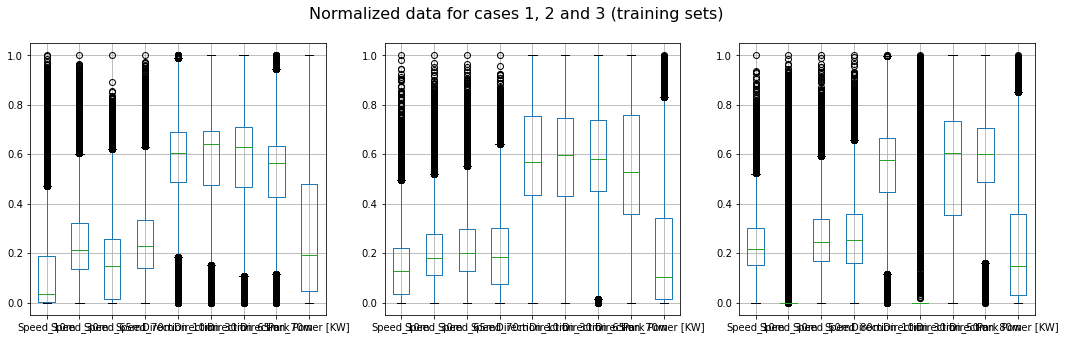

In [17]:
# Inspecting boxplots of normalized training data

fig = plt.figure(figsize=(18,5))

set_columns = ['Speed_10m','Speed_30m','Speed_65m','Speed_70m', \
                'Direction_10m','Direction_30m','Direction_65m','Direction_70m','Park Power [KW]']

ax1 = fig.add_subplot(131)
measurement_train_1.boxplot(column =set_columns)

ax2 = fig.add_subplot(132)
measurement_train_2.boxplot(column =set_columns)

set_columns = ['Speed_10m','Speed_30m','Speed_50m','Speed_80m', \
                'Direction_10m','Direction_30m','Direction_50m','Direction_80m','Park Power [KW]']

ax3 = fig.add_subplot(133)
measurement_train_3.boxplot(column =set_columns)

fig.suptitle('Normalized data for cases 1, 2 and 3 (training sets)', fontsize=16)

Text(0.5, 0.98, 'Normalized data for cases 1, 2 and 3 (test sets)')

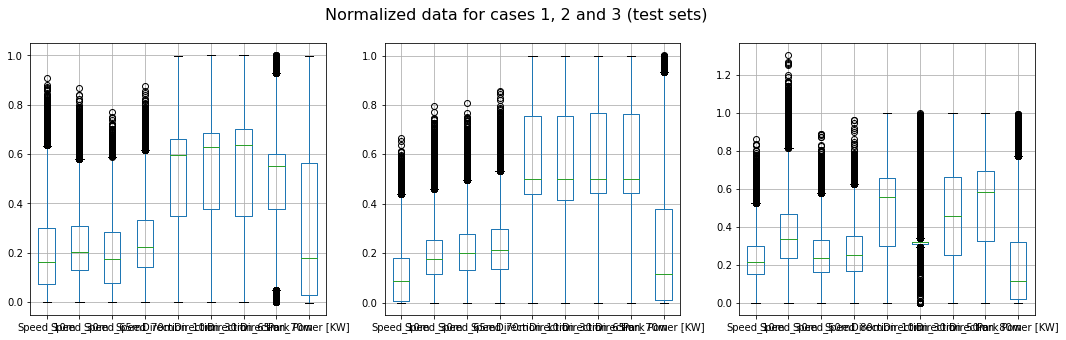

In [18]:
# Inspecting boxplots of normalized test data

fig = plt.figure(figsize=(18,5))

set_columns = ['Speed_10m','Speed_30m','Speed_65m','Speed_70m', \
                'Direction_10m','Direction_30m','Direction_65m','Direction_70m','Park Power [KW]']

ax1 = fig.add_subplot(131)
measurement_test_1.boxplot(column =set_columns)

ax2 = fig.add_subplot(132)
measurement_test_2.boxplot(column =set_columns)

set_columns = ['Speed_10m','Speed_30m','Speed_50m','Speed_80m', \
                'Direction_10m','Direction_30m','Direction_50m','Direction_80m','Park Power [KW]']

ax3 = fig.add_subplot(133)
measurement_test_3.boxplot(column =set_columns)

fig.suptitle('Normalized data for cases 1, 2 and 3 (test sets)', fontsize=16)

Text(0.5, 0.98, 'Normalized NWP data for cases 1, 2 and 3 (training sets)')

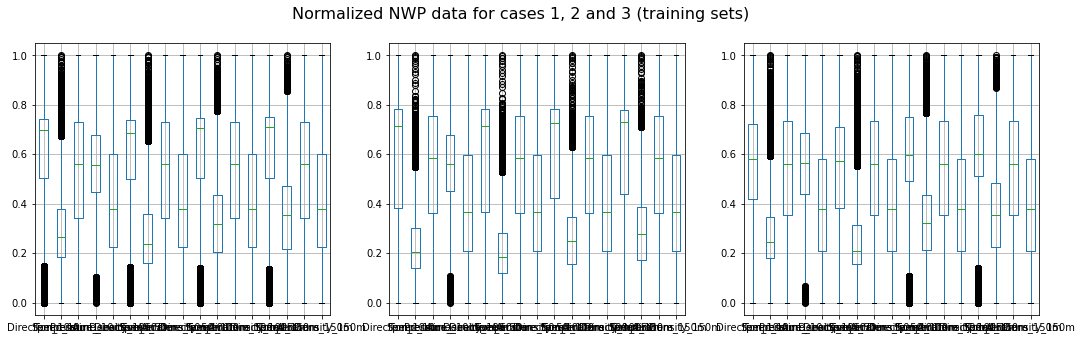

In [19]:
# Inspecting boxplots of normalized NWP training data

fig = plt.figure(figsize=(18,5))

set_columns = ['Direction_10m','Speed_10m','Temperature_10m','Pressure_seaLevel', \
                'Air Density_10m','Direction_50m','Speed_50m','Temperature_50m','Air Density_50m', \
                'Direction_100m','Speed_100m','Temperature_100m','Air Density_100m','Direction_150m','Speed_150m', \
                'Temperature_150m','Air Density_150m']

ax1 = fig.add_subplot(131)
nwp_train_1.boxplot(column =set_columns)

ax2 = fig.add_subplot(132)
nwp_train_2.boxplot(column =set_columns)

ax3 = fig.add_subplot(133)
nwp_train_3.boxplot(column =set_columns)

fig.suptitle('Normalized NWP data for cases 1, 2 and 3 (training sets)', fontsize=16)

Text(0.5, 0.98, 'Normalized NWP data for cases 1, 2 and 3 (test sets)')

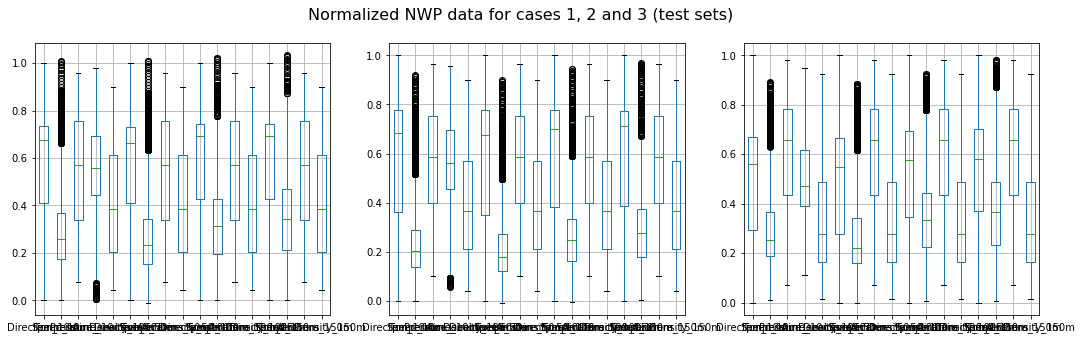

In [20]:
# Inspecting boxplots of normalized NWP test data

fig = plt.figure(figsize=(18,5))

set_columns = ['Direction_10m','Speed_10m','Temperature_10m','Pressure_seaLevel', \
                'Air Density_10m','Direction_50m','Speed_50m','Temperature_50m','Air Density_50m', \
                'Direction_100m','Speed_100m','Temperature_100m','Air Density_100m','Direction_150m','Speed_150m', \
                'Temperature_150m','Air Density_150m']

ax1 = fig.add_subplot(131)
nwp_test_1.boxplot(column =set_columns)

ax2 = fig.add_subplot(132)
nwp_test_2.boxplot(column =set_columns)

ax3 = fig.add_subplot(133)
nwp_test_3.boxplot(column =set_columns)

fig.suptitle('Normalized NWP data for cases 1, 2 and 3 (test sets)', fontsize=16)

In [21]:
# Assembling dataset that will be used for NN training/testing
# Datasets will be kept separate for cases 1, 2, 3

dataset_train_1 = pd.merge(nwp_train_1,measurement_train_1['Park Power [KW]'],left_index=True,right_index=True)
dataset_train_2 = pd.merge(nwp_train_2,measurement_train_2['Park Power [KW]'],left_index=True,right_index=True)
dataset_train_3 = pd.merge(nwp_train_3,measurement_train_3['Park Power [KW]'],left_index=True,right_index=True)
dataset_test_1 = pd.merge(nwp_test_1,measurement_test_1['Park Power [KW]'],left_index=True,right_index=True)
dataset_test_2 = pd.merge(nwp_test_2,measurement_test_2['Park Power [KW]'],left_index=True,right_index=True)
dataset_test_3 = pd.merge(nwp_test_3,measurement_test_3['Park Power [KW]'],left_index=True,right_index=True)

dataset_train_1.reset_index(level=0, inplace=True)
dataset_train_2.reset_index(level=0, inplace=True)
dataset_train_3.reset_index(level=0, inplace=True)
dataset_test_1.reset_index(level=0, inplace=True)
dataset_test_2.reset_index(level=0, inplace=True)
dataset_test_3.reset_index(level=0, inplace=True)

columns_rename = {'Air Density_10m': 'Air_Density_10m', 'Air Density_50m': 'Air_Density_50m', \
                                'Air Density_100m': 'Air_Density_100m', 'Air Density_150m': 'Air_Density_150m', \
                                'Park Power [KW]': 'Park_Power_[KW]' }

dataset_train_1.rename(columns=columns_rename, inplace=True)
dataset_train_2.rename(columns=columns_rename, inplace=True)
dataset_train_3.rename(columns=columns_rename, inplace=True)
dataset_test_1.rename(columns=columns_rename, inplace=True)
dataset_test_2.rename(columns=columns_rename, inplace=True)
dataset_test_3.rename(columns=columns_rename, inplace=True)

In [22]:
normdata = {'Type': ['Max','Min'], \
              'Direction_10m': [nwp_norm_1['Direction_10m']['max'],nwp_norm_1['Direction_10m']['min']], \
              'Speed_10m':  [nwp_norm_1['Speed_10m']['max'],nwp_norm_1['Speed_10m']['min']], \
              'Temperature_10m':  [nwp_norm_1['Temperature_10m']['max'],nwp_norm_1['Temperature_10m']['min']], \
              'Pressure_seaLevel':  [nwp_norm_1['Pressure_seaLevel']['max'],nwp_norm_1['Pressure_seaLevel']['min']], \
              'Air_Density_10m':  [nwp_norm_1['Air Density_10m']['max'],nwp_norm_1['Air Density_10m']['min']], \
              'Direction_50m':  [nwp_norm_1['Direction_50m']['max'],nwp_norm_1['Direction_50m']['min']], \
              'Speed_50m':  [nwp_norm_1['Speed_50m']['max'],nwp_norm_1['Speed_50m']['min']], \
              'Temperature_50m':  [nwp_norm_1['Temperature_50m']['max'],nwp_norm_1['Temperature_50m']['min']], \
              'Air_Density_50m':  [nwp_norm_1['Air Density_50m']['max'],nwp_norm_1['Air Density_50m']['min']], \
              'Direction_100m':  [nwp_norm_1['Direction_100m']['max'],nwp_norm_1['Direction_100m']['min']], \
              'Speed_100m':  [nwp_norm_1['Speed_100m']['max'],nwp_norm_1['Speed_100m']['min']], \
              'Temperature_100m':  [nwp_norm_1['Temperature_100m']['max'],nwp_norm_1['Temperature_100m']['min']], \
              'Air_Density_100m': [nwp_norm_1['Air Density_100m']['max'],nwp_norm_1['Air Density_100m']['min']], \
              'Direction_150m':  [nwp_norm_1['Direction_150m']['max'],nwp_norm_1['Direction_150m']['min']], \
              'Speed_150m':  [nwp_norm_1['Speed_150m']['max'],nwp_norm_1['Speed_150m']['min']], \
              'Temperature_150m':  [nwp_norm_1['Temperature_150m']['max'],nwp_norm_1['Temperature_150m']['min']], \
              'Air_Density_150m':  [nwp_norm_1['Air Density_150m']['max'],nwp_norm_1['Air Density_150m']['min']], \
              'Park_Power_[KW]':  [measurement_norm_1['Park Power [KW]']['max'],measurement_norm_1['Park Power [KW]']['min']] }


dataset_normdata_1 = pd.DataFrame(normdata)

normdata = {'Type': ['Max','Min'], \
              'Direction_10m': [nwp_norm_2['Direction_10m']['max'],nwp_norm_2['Direction_10m']['min']], \
              'Speed_10m':  [nwp_norm_2['Speed_10m']['max'],nwp_norm_2['Speed_10m']['min']], \
              'Temperature_10m':  [nwp_norm_2['Temperature_10m']['max'],nwp_norm_2['Temperature_10m']['min']], \
              'Pressure_seaLevel':  [nwp_norm_2['Pressure_seaLevel']['max'],nwp_norm_2['Pressure_seaLevel']['min']], \
              'Air_Density_10m':  [nwp_norm_2['Air Density_10m']['max'],nwp_norm_2['Air Density_10m']['min']], \
              'Direction_50m':  [nwp_norm_2['Direction_50m']['max'],nwp_norm_2['Direction_50m']['min']], \
              'Speed_50m':  [nwp_norm_2['Speed_50m']['max'],nwp_norm_2['Speed_50m']['min']], \
              'Temperature_50m':  [nwp_norm_2['Temperature_50m']['max'],nwp_norm_2['Temperature_50m']['min']], \
              'Air_Density_50m':  [nwp_norm_2['Air Density_50m']['max'],nwp_norm_2['Air Density_50m']['min']], \
              'Direction_100m':  [nwp_norm_2['Direction_100m']['max'],nwp_norm_2['Direction_100m']['min']], \
              'Speed_100m':  [nwp_norm_2['Speed_100m']['max'],nwp_norm_2['Speed_100m']['min']], \
              'Temperature_100m':  [nwp_norm_2['Temperature_100m']['max'],nwp_norm_2['Temperature_100m']['min']], \
              'Air_Density_100m': [nwp_norm_2['Air Density_100m']['max'],nwp_norm_2['Air Density_100m']['min']], \
              'Direction_150m':  [nwp_norm_2['Direction_150m']['max'],nwp_norm_2['Direction_150m']['min']], \
              'Speed_150m':  [nwp_norm_2['Speed_150m']['max'],nwp_norm_2['Speed_150m']['min']], \
              'Temperature_150m':  [nwp_norm_2['Temperature_150m']['max'],nwp_norm_2['Temperature_150m']['min']], \
              'Air_Density_150m':  [nwp_norm_2['Air Density_150m']['max'],nwp_norm_2['Air Density_150m']['min']], \
              'Park_Power_[KW]':  [measurement_norm_2['Park Power [KW]']['max'],measurement_norm_2['Park Power [KW]']['min']] }


dataset_normdata_2 = pd.DataFrame(normdata)

normdata = {'Type': ['Max','Min'], \
              'Direction_10m': [nwp_norm_3['Direction_10m']['max'],nwp_norm_3['Direction_10m']['min']], \
              'Speed_10m':  [nwp_norm_3['Speed_10m']['max'],nwp_norm_3['Speed_10m']['min']], \
              'Temperature_10m':  [nwp_norm_3['Temperature_10m']['max'],nwp_norm_3['Temperature_10m']['min']], \
              'Pressure_seaLevel':  [nwp_norm_3['Pressure_seaLevel']['max'],nwp_norm_3['Pressure_seaLevel']['min']], \
              'Air_Density_10m':  [nwp_norm_3['Air Density_10m']['max'],nwp_norm_3['Air Density_10m']['min']], \
              'Direction_50m':  [nwp_norm_3['Direction_50m']['max'],nwp_norm_3['Direction_50m']['min']], \
              'Speed_50m':  [nwp_norm_3['Speed_50m']['max'],nwp_norm_3['Speed_50m']['min']], \
              'Temperature_50m':  [nwp_norm_3['Temperature_50m']['max'],nwp_norm_3['Temperature_50m']['min']], \
              'Air_Density_50m':  [nwp_norm_3['Air Density_50m']['max'],nwp_norm_3['Air Density_50m']['min']], \
              'Direction_100m':  [nwp_norm_3['Direction_100m']['max'],nwp_norm_3['Direction_100m']['min']], \
              'Speed_100m':  [nwp_norm_3['Speed_100m']['max'],nwp_norm_3['Speed_100m']['min']], \
              'Temperature_100m':  [nwp_norm_3['Temperature_100m']['max'],nwp_norm_3['Temperature_100m']['min']], \
              'Air_Density_100m': [nwp_norm_3['Air Density_100m']['max'],nwp_norm_3['Air Density_100m']['min']], \
              'Direction_150m':  [nwp_norm_3['Direction_150m']['max'],nwp_norm_3['Direction_150m']['min']], \
              'Speed_150m':  [nwp_norm_3['Speed_150m']['max'],nwp_norm_3['Speed_150m']['min']], \
              'Temperature_150m':  [nwp_norm_3['Temperature_150m']['max'],nwp_norm_3['Temperature_150m']['min']], \
              'Air_Density_150m':  [nwp_norm_3['Air Density_150m']['max'],nwp_norm_3['Air Density_150m']['min']], \
              'Park_Power_[KW]':  [measurement_norm_3['Park Power [KW]']['max'],measurement_norm_3['Park Power [KW]']['min']] }


dataset_normdata_3 = pd.DataFrame(normdata)
dataset_normdata_3

,Type,Direction_10m,Speed_10m,Temperature_10m,Pressure_seaLevel,Air_Density_10m,Direction_50m,Speed_50m,Temperature_50m,Air_Density_50m,Direction_100m,Speed_100m,Temperature_100m,Air_Density_100m,Direction_150m,Speed_150m,Temperature_150m,Air_Density_150m,Park_Power_[KW]
0,Max,359.0,11.0,35.8,1021.4,1.432,359.0,9.7,35.8,1.432,359.0,16.0,35.8,1.432,359.0,23.0,35.8,1.432,49789.0
1,Min,0.0,0.0,-25.8,962.0,1.109,0.0,0.1,-25.8,1.109,0.0,0.0,-25.8,1.109,0.0,0.1,-25.8,1.109,0.0


In [23]:
# Creating normdata files

dataset_normdata_1.to_csv(dataPath+'\Case1\Dataset_NormData_1_new.csv', index=False)
dataset_normdata_2.to_csv(dataPath+'\Case2\Dataset_NormData_2_new.csv', index=False)
dataset_normdata_3.to_csv(dataPath+'\Case3\Dataset_NormData_3_new.csv', index=False)


In [24]:
# Creating files

dataset_train_1.to_csv(dataPath+'\Case1\Dataset_Train_1_new.csv', index=False)
dataset_test_1.to_csv(dataPath+'\Case1\Dataset_Test_1_new.csv', index=False)

dataset_train_2.to_csv(dataPath+'\Case2\Dataset_Train_2_new.csv', index=False)
dataset_test_2.to_csv(dataPath+'\Case2\Dataset_Test_2_new.csv', index=False)

dataset_train_3.to_csv(dataPath+'\Case3\Dataset_Train_3_new.csv', index=False)
dataset_test_3.to_csv(dataPath+'\Case3\Dataset_Test_3_new.csv', index=False)

In [25]:
# Assembling complete dataset that will be used for NN training/testing
# Datasets will be kept separate for cases 1, 2, 3

# Renaming column names to avoid confusions in merged datasets
# Prefix M_ means Measured, prefix P_ means Predicted

columns_rename = {'Speed_10m': 'M_Speed_10m', 'Speed_30m': 'M_Speed_30m', 'Speed_65m': 'M_Speed_65m', \
                    'Speed_70m': 'M_Speed_70m', 'Direction_10m': 'M_Direction_10m', 'Direction_30m': 'M_Direction_30m', \
                    'Direction_65m': 'M_Direction_65m', 'Direction_70m': 'M_Direction_70m', 'Park Power [KW]': 'Park_Power_[KW]' }

measurement_train_1.rename(columns=columns_rename, inplace=True)
measurement_train_2.rename(columns=columns_rename, inplace=True)
measurement_test_1.rename(columns=columns_rename, inplace=True)
measurement_test_2.rename(columns=columns_rename, inplace=True)

columns_rename = {'Speed_10m': 'M_Speed_10m', 'Speed_30m': 'M_Speed_30m', 'Speed_50m': 'M_Speed_50m', \
                    'Speed_80m': 'M_Speed_80m', 'Direction_10m': 'M_Direction_10m', 'Direction_30m': 'M_Direction_30m', \
                    'Direction_50m': 'M_Direction_50m', 'Direction_80m': 'M_Direction_80m', 'Park Power [KW]': 'Park_Power_[KW]' }

measurement_train_3.rename(columns=columns_rename, inplace=True)
measurement_test_3.rename(columns=columns_rename, inplace=True)

columns_rename = {'Air Density_10m': 'P_Air_Density_10m', 'Air Density_50m': 'P_Air_Density_50m', \
                                'Air Density_100m': 'P_Air_Density_100m', 'Air Density_150m': 'P_Air_Density_150m', \
                                'Direction_10m': 'P_Direction_10m', 'Direction_50m': 'P_Direction_50m', \
                                'Direction_100m': 'P_Direction_100m', 'Direction_150m': 'P_Direction_150m', \
                                'Speed_10m': 'P_Speed_10m', 'Speed_50m': 'P_Speed_50m', \
                                'Speed_100m': 'P_Speed_100m', 'Speed_150m': 'P_Speed_150m', \
                                'Temperature_10m': 'P_Temperature_10m', 'Temperature_50m': 'P_Temperature_50m', \
                                'Temperature_100m': 'P_Temperature_100m', 'Temperature_150m': 'P_Temperature_150m', \
                                'Pressure_seaLevel': 'P_Pressure_seaLevel' }
                                
nwp_train_1.rename(columns=columns_rename, inplace=True)
nwp_train_2.rename(columns=columns_rename, inplace=True)
nwp_train_3.rename(columns=columns_rename, inplace=True)
nwp_test_1.rename(columns=columns_rename, inplace=True)
nwp_test_2.rename(columns=columns_rename, inplace=True)
nwp_test_3.rename(columns=columns_rename, inplace=True)

# Merging datasets

dataset_train_1 = pd.merge(nwp_train_1,measurement_train_1,left_index=True,right_index=True)
dataset_train_2 = pd.merge(nwp_train_2,measurement_train_2,left_index=True,right_index=True)
dataset_train_3 = pd.merge(nwp_train_3,measurement_train_3,left_index=True,right_index=True)
dataset_test_1 = pd.merge(nwp_test_1,measurement_test_1,left_index=True,right_index=True)
dataset_test_2 = pd.merge(nwp_test_2,measurement_test_2,left_index=True,right_index=True)
dataset_test_3 = pd.merge(nwp_test_3,measurement_test_3,left_index=True,right_index=True)

dataset_train_1.reset_index(level=0, inplace=True)
dataset_train_2.reset_index(level=0, inplace=True)
dataset_train_3.reset_index(level=0, inplace=True)
dataset_test_1.reset_index(level=0, inplace=True)
dataset_test_2.reset_index(level=0, inplace=True)
dataset_test_3.reset_index(level=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [26]:
# Creating files

dataset_train_1.to_csv(dataPath+'\Case1\Dataset_Train_1_complete.csv', index=False)
dataset_test_1.to_csv(dataPath+'\Case1\Dataset_Test_1_complete.csv', index=False)

dataset_train_2.to_csv(dataPath+'\Case2\Dataset_Train_2_complete.csv', index=False)
dataset_test_2.to_csv(dataPath+'\Case2\Dataset_Test_2_complete.csv', index=False)

dataset_train_3.to_csv(dataPath+'\Case3\Dataset_Train_3_complete.csv', index=False)
dataset_test_3.to_csv(dataPath+'\Case3\Dataset_Test_3_complete.csv', index=False)